In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rand
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import math
from matplotlib import cm
# import timeit
from scipy.integrate import odeint
from scipy import stats
from EDMtoolkit import *
from modelSystems import *
import datetime

plt.rcParams['text.usetex'] = True

%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
# Returns a Table with columns
#    Relevant Variable      (0,1,2,..)
#    Nonstationarity Status (0,1,2)
#    Delta
#    Theta
#    R squared

def computeRound(ns_list, E, model, tau=1, T=(200,), obs_noise=(0,), pro_noise=(0,), N_replicates=100):
    pass

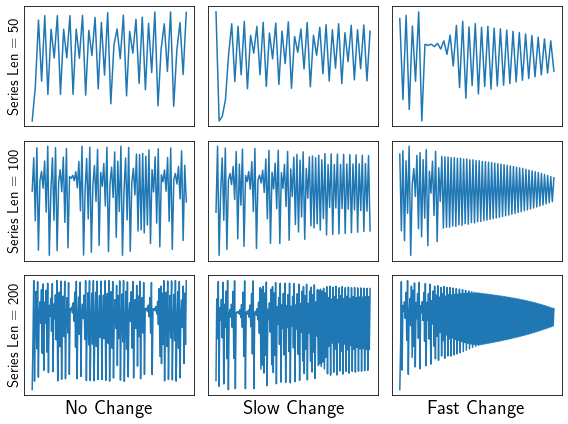

In [3]:
# Time Series Length versus Nonstationarity Rate
T_list = (50, 100, 200)
r_list = (lambda t: 3.75, lambda t: 3.75 - 0.25 * t, lambda t: 3.75 - 0.75 * t)
N_replicates = 100
E_max = 3
ns_status = ["No Change", "Slow Change", "Fast Change"]

# Time Series Length, nonstationarity status, delta, theta, r_sqrd
results = np.zeros((N_replicates * len(T_list) * len(r_list), 5))
results_index = 0

fig, ax = plt.subplots(3,3,figsize=(8,6), tight_layout=True)

for ti, T in enumerate(T_list):
    for ri, r in enumerate(r_list):
        for i in range(N_replicates):
            x0 = rand.rand(1)
            Xr = standardize(generateLogisticMapProcessNoise(tlen = T,
                                                        r=r, x0 = x0))
            
            ax[ti, ri].plot(np.linspace(0,1,num=T), Xr)
            ax[ti, ri].set_xticks([])
            ax[ti, ri].set_yticks([])
            
            """
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
            
            results[results_index] = np.array([T, ri, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"logistic_T_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")
"""

for i in range(3):
    ax[i,0].set_ylabel(r"Series Len = {}".format(T_list[i]), rotation=90,
                     fontsize=15)
    ax[2,i].set_xlabel(r"{}".format(ns_status[i]), fontsize=20)
# plt.savefig("../Figures/simulation_series_supplement/round2_logistic_T.png", dpi=300)
plt.savefig("../PDF_figures_tables/example_series/round2_logistic_T.pdf", format="pdf", bbox_inches="tight")

In [391]:
# np.mean(results[np.logical_and(results[:,0] == 50, results[:,1]==1),2] > 0.1)

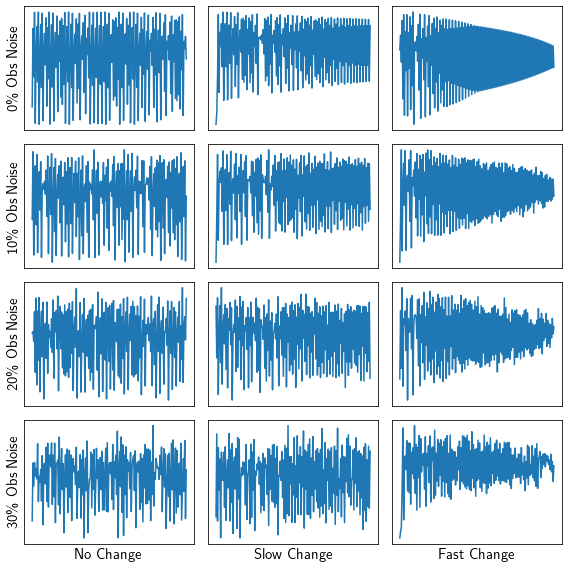

In [4]:
# Observation Noise versus Nonstationarity Rate
T = 200
obs_list = (0.0,0.1,0.2,0.3)
r_list = (lambda t: 3.75, lambda t: 3.75 - 0.25 * t, lambda t: 3.75 - 0.75 * t)
# r_list = (lambda t: 4, lambda t: 4 - 0.25 * t / T, lambda t: 4 - t / T)
N_replicates = 1
E_max = 3

# observation noise, nonstationarity status, delta, theta, r_sqrd
results = np.zeros((N_replicates * len(obs_list) * len(r_list), 5))
results_index = 0

fig, ax = plt.subplots(4,3,figsize=(8,8), tight_layout=True)

for oi, o_n in enumerate(obs_list):
    for ri, r in enumerate(r_list):
        for i in range(N_replicates):
            x0 = rand.rand(1)
            Xr = standardize(generateLogisticMapProcessNoise(r=r, x0 = x0))
            # Xr = generateTimeSeriesDiscrete("LogisticP", x0, tlen=T, nsargs=(r,), settlingTime=settlingTime)
            Xr += (rand.normal(0, o_n, T))[:,None]
            
            ax[oi, ri].plot(np.linspace(0,1,num=T), Xr)
            ax[oi, ri].set_xticks([])
            ax[oi, ri].set_yticks([])
            
            """
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
            
            results[results_index] = np.array([o_n, ri, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"logistic_obsnoise_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")
"""
for i in range(4):
    ax[i,0].set_ylabel(r"{}\% Obs Noise".format(["0","10","20","30"][i]), rotation=90,
                     fontsize=15)
for i in range(3):
    ax[3,i].set_xlabel(r"{}".format(ns_status[i]), fontsize=15)
# plt.savefig("../Figures/simulation_series_supplement/round2_logistic_z_o.png", dpi=300)
plt.savefig("../PDF_figures_tables/example_series/round2_logistic_z_o.pdf", format="pdf", bbox_inches="tight")

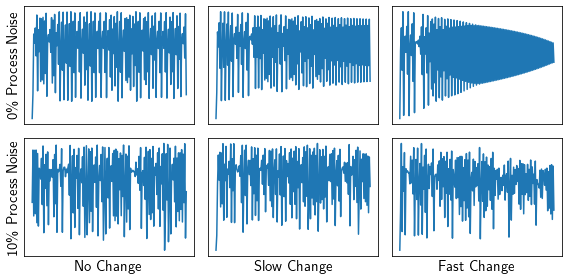

In [8]:
# Process Noise versus Nonstationarity Rate
T = 200
pro_list = (0.0, logistic_process_noise)
r_list = (lambda t: 3.75, lambda t: 3.75 - 0.25 * t, lambda t: 3.75 - 0.75 * t)
# r_list = (lambda t: 4, lambda t: 4 - 0.25 * t / T, lambda t: 4 - t / T)
N_replicates = 1
E_max = 3

# process noise, nonstationarity status, delta, theta, r_sqrd
results = np.zeros((N_replicates * len(pro_list) * len(r_list), 5))
results_index = 0

fig, ax = plt.subplots(2,3,figsize=(8,4), tight_layout=True)

for pi, p_n in enumerate(pro_list):
    for ri, r in enumerate(r_list):
        for i in range(N_replicates):
            x0 = rand.rand(1)
            
            # generate time series, regenerating if it explodes
            # Xr = generateTimeSeriesDiscrete("LogisticP", x0,
            #    tlen=T, nsargs=(r,), settlingTime=settlingTime,
            #    process_noise=p_n)
            Xr = standardize(generateLogisticMapProcessNoise(
                             process_noise = p_n, r=r, x0 = x0))
            
            # while np.any(np.isnan(Xr)):
            #     Xr = generateTimeSeriesDiscrete("LogisticP", x0, tlen=T, nsargs=(r,), settlingTime=settlingTime, process_noise=p_n)
        
            ax[pi, ri].plot(np.linspace(0,1,num=T), Xr)
            ax[pi, ri].set_xticks([])
            ax[pi, ri].set_yticks([])
        
            """
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
            
            results[results_index] = np.array([p_n, ri, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"logistic_pronoise_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")
"""
for i in range(2):
    ax[i,0].set_ylabel(r"{}\% Process Noise".format(["0", "10"][i]), rotation=90,
                     fontsize=15)
for i in range(3):
    ax[1,i].set_xlabel(r"{}".format(ns_status[i]), fontsize=15)
# plt.savefig("../Figures/simulation_series_supplement/round2_logistic_z_p.png", dpi=300)
plt.savefig("../PDF_figures_tables/example_series/round2_logistic_z_p.pdf", format="pdf", bbox_inches="tight")

# Food Chain

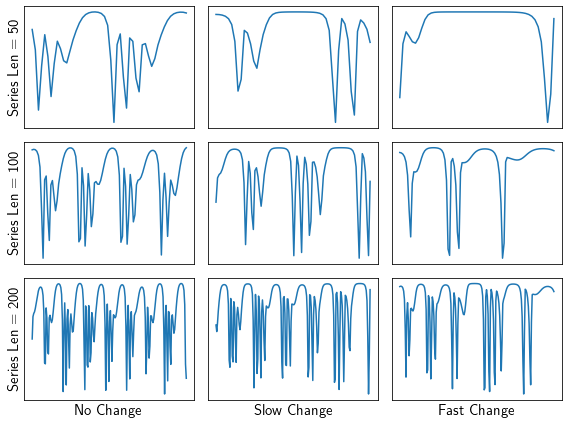

In [9]:
# Time Series Length versus Nonstationarity Rate
T_list = (50, 100, 200)
b1_list = (lambda t: 3, lambda t: 3 + 2 * t / end, lambda t: 3 + 4 * t / end)
N_replicates = 1
E_max = 4
tau = 1
settlingTime = 2 ** 9
reduction = 2 ** 8

# Time Series Length, nonstationarity status, delta, theta, r_sqrd
# results = np.zeros((N_replicates * len(T_list) * len(b1_list), 5))
# results_index = 0

fig, ax = plt.subplots(3,3,figsize=(8,6), tight_layout=True)

for ti, T in enumerate(T_list):
    end = T * 5
    
    for b1i, b1 in enumerate(b1_list):
        for i in range(N_replicates):
            
            
            x0 = np.array([0.1,0.4,9]) + rand.random(3)
            Xr = standardize(generateTimeSeriesContinuous('HastingsPowellP',
                                        x0, end=end, tlen = T, nsargs=(b1,), 
                                        reduction = reduction, settlingTime=settlingTime, 
                                        process_noise=0)[:,0,None])
    
            ax[ti, b1i].plot(np.linspace(0,1,num=T), Xr)
            ax[ti, b1i].set_xticks([])
            ax[ti, b1i].set_yticks([])
            
            """
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, tau=tau, return_forecast_skill=True)
            
            results[results_index] = np.array([T, b1i, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"hastings_powell_T_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")
"""
for i in range(3):
    ax[i,0].set_ylabel(r"Series Len = {}".format(T_list[i]), rotation=90,
                     fontsize=15)
    ax[2,i].set_xlabel(r"{}".format(ns_status[i]), fontsize=15)
# plt.savefig("../Figures/simulation_series_supplement/round2_food_chain_T.png", dpi=300)
plt.savefig("../PDF_figures_tables/example_series/round2_food_chain_T.pdf", format="pdf", bbox_inches="tight")

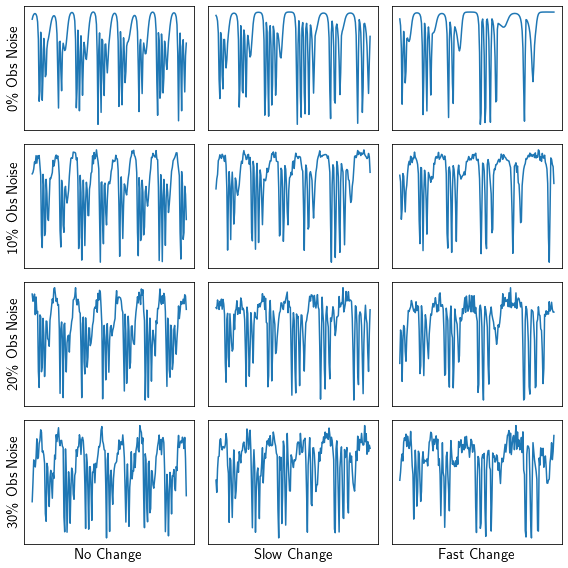

In [10]:
# Observation Noise versus Nonstationarity Rate
T = 200
end = T * 5
# n_years = T / 12
# end = n_years * 60

obs_list = (0.0,0.1,0.2,0.3)
b1_list = (lambda t: 3, lambda t: 3 + 2 * t / end, lambda t: 3 + 4 * t / end)
# b1_list = (lambda t: 3, lambda t: 3 + 1 * t / end, lambda t: 3 + 3 * t / end)
N_replicates = 1

# log_std is calculated as the standard deviation on a stationary hastings powell map series with T=200 and b1=3
log_std = 0.20682984252169215

# observation noise, nonstationarity status, delta, theta, r_sqrd
results = np.zeros((N_replicates * len(obs_list) * len(b1_list), 5))
results_index = 0

fig, ax = plt.subplots(4,3,figsize=(8,8), tight_layout=True)

for oi, o_n in enumerate(obs_list):
    for b1i, b1 in enumerate(b1_list):
        for i in range(N_replicates):
            x0 = np.array([0.1,0.4,9]) + rand.random(3)
            Xr = standardize(generateTimeSeriesContinuous('HastingsPowellP', x0, end=end, tlen = T, nsargs=(b1,), 
                                              reduction = reduction, settlingTime=settlingTime, 
                                              process_noise=0)[:,0,None])
            Xr += (rand.normal(0, o_n, T))[:,None]
            
            ax[oi, b1i].plot(np.linspace(0,1,num=T), Xr)
            ax[oi, b1i].set_xticks([])
            ax[oi, b1i].set_yticks([])
            
            """
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
            
            results[results_index] = np.array([o_n, b1i, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"hastings_powell_obsnoise_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")
"""
for i in range(4):
    ax[i,0].set_ylabel(r"{}\% Obs Noise".format([0,10,20,30][i]), rotation=90,
                     fontsize=15)
for i in range(3):
    ax[3,i].set_xlabel(r"{}".format(ns_status[i]), fontsize=15)
# plt.savefig("../Figures/simulation_series_supplement/round2_food_chain_z_o.png", dpi=300)
plt.savefig("../PDF_figures_tables/example_series/round2_food_chain_z_o.pdf", format="pdf", bbox_inches="tight")

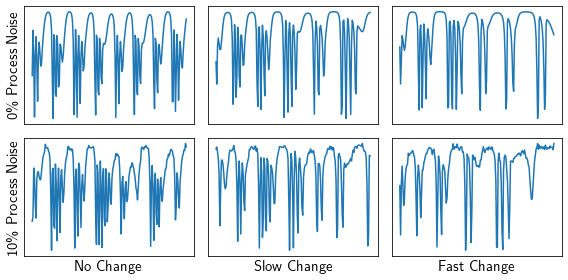

In [11]:
# Process Noise versus Nonstationarity Rate
T = 200
end = T * 5
# n_years = T / 12
# end = n_years * 60

pro_list = (0.0, 0.017)
b1_list = (lambda t: 3, lambda t: 3 + 2 * t / end, lambda t: 3 + 4 * t / end)
# b1_list = (lambda t: 3, lambda t: 3 + 1 * t / end, lambda t: 3 + 3 * t / end)
N_replicates = 1

fig, ax = plt.subplots(2,3,figsize=(8,4), tight_layout=True)

# process noise, nonstationarity status, delta, theta, r_sqrd
results = np.zeros((N_replicates * len(pro_list) * len(b1_list), 5))
results_index = 0

for pi, p_n in enumerate(pro_list):
    for b1i, b1 in enumerate(b1_list):
        for i in range(N_replicates):
            x0 = np.array([0.1,0.4,9]) + rand.random(3)
            Xr = standardize(generateTimeSeriesContinuous('HastingsPowellP', x0, end=end, tlen = T, nsargs=(b1,), 
                                              reduction = reduction, settlingTime=settlingTime, 
                                              process_noise=p_n)[:,0,None])
            
            ax[pi, b1i].plot(np.linspace(0,1,num=T), Xr)
            ax[pi, b1i].set_xticks([])
            ax[pi, b1i].set_yticks([])
            
            """
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
            
            results[results_index] = np.array([p_n, b1i, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"hastings_powell_pronoise_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")
"""
for i in range(2):
    ax[i,0].set_ylabel(r"{}\% Process Noise".format(["0", "10"][i]), rotation=90,
                     fontsize=15)
for i in range(3):
    ax[1,i].set_xlabel(r"{}".format(ns_status[i]), fontsize=15)

# plt.savefig("../Figures/simulation_series_supplement/round2_food_chain_z_p.png", dpi=300)
plt.savefig("../PDF_figures_tables/example_series/round2_food_chain_z_p.pdf", format="pdf", bbox_inches="tight")

# The figure
This figure emulates the version found in the chaos paper, which encodes many dimensions as a grid of heatmaps.

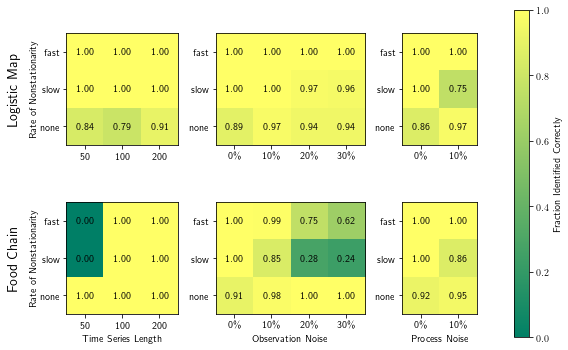

In [13]:
fig = plt.figure(tight_layout=True,figsize=(8,5))
shrink = 0.8
grid = gridspec.GridSpec(2,4, width_ratios=[3,4,2,0.4])
nice_variable_names = ["Time Series Length", "Observation Noise","Process Noise"]
nice_model_names = ["Logistic Map", "Food Chain"]
# fig, ax = plt.subplots(2,3)
# plt.tight_layout()

for i, model in enumerate(["logistic", "hastings_powell"]):
    for j, variable in enumerate(["T","obsnoise","pronoise"]):
        filename = f"simulation_results_final/{model}_{variable}_vs_NS_Rate.csv"
        table = np.loadtxt(filename, delimiter=",")
        
        # observation noise, nonstationarity status, delta, theta, r_sqrd
        variables = np.unique(table[:,0])
        heatmap = np.zeros((3,len(variables)))

        ax = fig.add_subplot(grid[i,j]) if j < 2 else fig.add_subplot(grid[i,2:3])
        
        for k, val in enumerate(variables):
            for nsrate in range(3):
                accuracy = np.mean(table[np.logical_and(table[:,0] == val,table[:,1] == nsrate),2] > 0.1)
                accuracy = accuracy if nsrate else 1 - accuracy
                heatmap[nsrate,k] = accuracy
                ax.text(k,nsrate,f"{accuracy:.2f}",ha='center',va='center')
        
        aximage = ax.imshow(heatmap,vmin=0,vmax=1,cmap='summer')
        left, right, _, _ = aximage.get_extent()
        
        ax.set_xticks(np.arange(len(variables)))
        if j == 0:
            ax.set_xticklabels(variables.astype(int))
        elif j == 1:
            ax.set_xticklabels(np.array(["0\%","10\%","20\%","30\%"]))
        else:
            ax.set_xticklabels(np.array(["0\%","10\%"]))
        if model == "hastings_powell":
            ax.set_xlabel(nice_variable_names[j])
        ax.set_yticks(np.arange(3))
        ax.set_yticklabels(["none","slow","fast"])
        ax.set_ylim([-0.5,2.5])
        
        if (j == 0):
            # ax.set_ylabel(nice_model_names[i], labelpad=25, fontsize=12)
            ax.set_ylabel(nice_model_names[i], labelpad = 20, fontsize=14)
            fig.text(-0.25, 0.5, "Rate of Nonstationarity", rotation="vertical", transform=ax.transAxes,
                              horizontalalignment="right", verticalalignment="center")
            
# fig.text(0.07,0.5375,"Rate of Nonstationarity", rotation="vertical",
#          horizontalalignment="center", verticalalignment="center", size=12 )
# plt.tight_layout()
# cax = plt.axes([0.905, 0.09, 0.02, 0.845])
# fig.colorbar(aximage, cax = cax, label = "Fraction Identified Correctly")
colorbar_ax = fig.add_subplot(grid[:,3])
fig.colorbar(aximage, cax = colorbar_ax, 
             label = "Fraction Identified Correctly", 
             shrink=0.1, anchor=(1000,1))
# plt.savefig("../Figures/round2.png", dpi=300)
plt.savefig("../PDF_figures_tables/round2_results/round2.pdf", format="pdf", bbox_inches="tight")

# Nonstationarity Identification Performance versus Forecast Performance
Is poor forecast skill indicative of poor ability to distinguish stationary and nonstationary systems?

In [190]:
ns_id_v_f_p = np.zeros((54,2))
ind = 0

for i, model in enumerate(["logistic", "hastings_powell"]):
    for j, variable in enumerate(["T","obsnoise","pronoise"]):
        filename = f"simulation_results_final/{model}_{variable}_vs_NS_Rate.csv"
        table = np.loadtxt(filename, delimiter=",")
        
        variables = np.unique(table[:,0])
        
        for k, val in enumerate(variables):
            for nsrate in range(3):
                accuracy = np.mean(table[np.logical_and(table[:,0] == val,table[:,1] == nsrate),2] > 0.1)
                accuracy = accuracy if nsrate else 1 - accuracy
                # print(table[np.logical_and(table[:,0] == val,table[:,1] == nsrate),4])
                
                avg_forecast_skill = np.mean(table[np.logical_and(table[:,0] == val,table[:,1] == nsrate),4])
                ns_id_v_f_p[ind] = np.array([avg_forecast_skill, accuracy])
                ind += 1

Text(0.5, 1.0, 'Does forecast skill predict nonstationarity identification rate? (Round 2)')

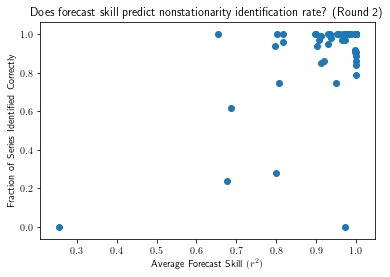

In [202]:
fig, ax = plt.subplots(1)
ax.scatter(ns_id_v_f_p[:,0], ns_id_v_f_p[:,1])
ax.set_xlabel(r"Average Forecast Skill $(r^2)$")
ax.set_ylabel("Fraction of Series Identified Correctly")
ax.set_title("Does forecast skill predict nonstationarity identification rate? (Round 2)")

In [203]:
np.corrcoef(ns_id_v_f_p[:,0], ns_id_v_f_p[:,1])

array([[1.        , 0.35471245],
       [0.35471245, 1.        ]])

In [194]:
ns_id_v_f_p

array([[0.999973, 0.84    ],
       [0.999409, 1.      ],
       [0.997062, 1.      ],
       [1.      , 0.79    ],
       [0.999881, 1.      ],
       [0.999545, 1.      ],
       [1.      , 0.91    ],
       [0.999992, 1.      ],
       [0.99993 , 1.      ],
       [1.      , 0.89    ],
       [0.999996, 1.      ],
       [0.999896, 1.      ],
       [0.973381, 0.97    ],
       [0.971407, 1.      ],
       [0.968288, 1.      ],
       [0.902635, 0.94    ],
       [0.908848, 0.97    ],
       [0.897731, 1.      ],
       [0.797434, 0.94    ],
       [0.818547, 0.96    ],
       [0.802745, 1.      ],
       [1.      , 0.86    ],
       [0.999987, 1.      ],
       [0.99989 , 1.      ],
       [0.964959, 0.97    ],
       [0.949139, 0.75    ],
       [0.901105, 1.      ],
       [0.9538  , 1.      ],
       [0.9737  , 0.      ],
       [0.2543  , 0.      ],
       [0.9883  , 1.      ],
       [0.9572  , 1.      ],
       [0.9358  , 1.      ],
       [0.9988  , 1.      ],
       [0.9806

# Process Noise Parameter Determination

In [54]:
## LOGISTIC MAP ##

compute_logistic_variance = lambda p : np.mean(np.array([
                            np.var(generateLogisticMapProcessNoise(
                            process_noise = p, r=lambda t: 3.75,
                            x0 = rand.rand(1)[0]))
                            for _ in range(100)]))

logistic_null_variance = compute_logistic_variance(0)

pn = np.linspace(0,1,num=50)
varratios = np.array([compute_logistic_variance(p) / 
                      logistic_null_variance 
                      for p in pn])

In [6]:
# FINAL VALUE 

# logistic_process_noise = (pn[varratios > 1.1])[0]
logistic_process_noise = 0.26530612244897955

In [107]:
## FOOD CHAIN ## 

compute_food_chain_variance = lambda p : np.var(
                                [generateTimeSeriesContinuous(
                                    'HastingsPowellP', x0 + rand.random(3) * 0.1,
                                    nsargs=(lambda t: 3,), end=200*8,
                                    tlen = 200, reduction = reduction,
                                    settlingTime=settlingTime,
                                    process_noise=p)[:,0,None]
                                for _ in range(100)])

food_chain_null_variance = compute_food_chain_variance(0)

pn = np.linspace(0,0.05,num=20)
ratios = np.array([compute_food_chain_variance(p) / 
                   food_chain_null_variance 
                   for p in pn])

In [145]:
# FINAL VALUE

food_chain_process_noise = (pn[ratios > 1.1])[0]
food_chain_process_noise

0.018421052631578946